In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
raw_data = pd.read_excel('raw_data2.xlsx')
raw_data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
0,1,2020-06-01 00,8179.056,17.6,2.5,92,0.8,0.0,1,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91,0.3,0.0,1,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91,0.0,0.0,1,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91,0.0,0.0,1,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92,0.0,0.0,1,0,0
5,1,2020-06-01 05,8010.576,16.9,3.4,93,0.0,0.0,1,0,0
6,1,2020-06-01 06,7978.176,16.7,3.4,90,0.1,0.0,1,0,0
7,1,2020-06-01 07,8019.000,16.9,2.3,86,0.0,0.1,1,0,0
8,1,2020-06-01 08,8020.944,17.8,3.3,80,0.0,0.3,0,1,0
9,1,2020-06-01 09,8083.152,19.3,2.1,73,0.0,0.7,0,1,0


In [3]:
raw_data.corr()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
전력사용량(kWh),NaN,1.000000,0.637313,0.057756,-0.007981,0.001241,0.064190,-0.291937,0.291937,0.755105
기온(°C),NaN,0.637313,1.000000,0.141183,-0.529771,-0.113308,0.504956,-0.460590,0.460590,0.585676
풍속(m/s),NaN,0.057756,0.141183,1.000000,-0.115921,0.189296,0.158611,-0.298931,0.298931,0.080485
습도(%),NaN,-0.007981,-0.529771,-0.115921,1.000000,0.266364,-0.636673,0.358221,-0.358221,-0.049369
강수량(mm),NaN,0.001241,-0.113308,0.189296,0.266364,1.000000,-0.114833,0.027640,-0.027640,-0.018338
일조(hr),NaN,0.064190,0.504956,0.158611,-0.636673,-0.114833,1.000000,-0.344968,0.344968,0.088316
time_0,NaN,-0.291937,-0.460590,-0.298931,0.358221,0.027640,-0.344968,1.000000,-1.000000,-0.341195
time_1,NaN,0.291937,0.460590,0.298931,-0.358221,-0.027640,0.344968,-1.000000,1.000000,0.341195
power_cat,NaN,0.755105,0.585676,0.080485,-0.049369,-0.018338,0.088316,-0.341195,0.341195,1.000000


In [4]:
from matplotlib import font_manager, rc #한글처리
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226CD861C18>,
      dtype=object)

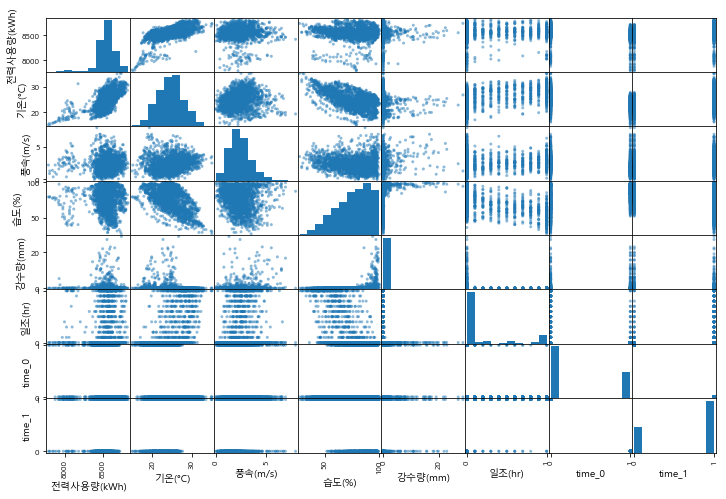

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["전력사용량(kWh)", "기온(°C)", "풍속(m/s)", "습도(%)", "강수량(mm)", "일조(hr)", "time_0", "time_1"]
scatter_matrix(raw_data[attributes], figsize=(12,8))

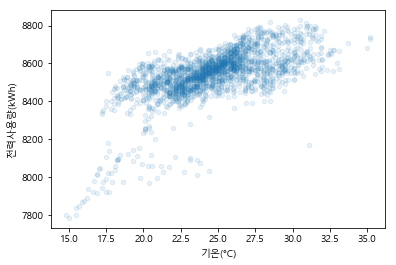

In [6]:
raw_data.plot(kind="scatter", x="기온(°C)", y="전력사용량(kWh)",alpha=0.1)

In [7]:
train_pre = raw_data[['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)','time_0','time_1']]
train_pre

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1
0,17.6,2.5,92,0.8,0.0,1,0
1,17.7,2.9,91,0.3,0.0,1,0
2,17.5,3.2,91,0.0,0.0,1,0
3,17.1,3.2,91,0.0,0.0,1,0
4,17.0,3.3,92,0.0,0.0,1,0
5,16.9,3.4,93,0.0,0.0,1,0
6,16.7,3.4,90,0.1,0.0,1,0
7,16.9,2.3,86,0.0,0.1,1,0
8,17.8,3.3,80,0.0,0.3,0,1
9,19.3,2.1,73,0.0,0.7,0,1


In [8]:
# 공부할 데이터/검증용 데이터 분리
# 머신러닝용 라이브러리: sklearn, 사이킷런
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score #채점해주는 라이브러리
from sklearn.tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, #데이터프레임의 속성들
                 raw_data[['power_cat']], #맞추어야할 정답
                 test_size = 0.2, #테스트데이터 20%지정, 훈련데이터 80%할당
                 stratify = raw_data[['power_cat']],
                 shuffle = True,
                 random_state = 13, #seed값                                                                                   
                )

In [10]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [22]:
model = DecisionTreeClassifier()
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split':[4,5,6,7,8]
}
randomized_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=10, return_train_score=True)

randomized_search.fit(X_train, y_train)

df = pd.DataFrame(randomized_search.cv_results_).sort_values(by=['mean_test_score', 'mean_train_score'], ascending=False)
print(df[['params', 'mean_train_score', 'mean_test_score']])

                                              params  mean_train_score  \
8  {'min_samples_split': 7, 'max_depth': 9, 'crit...          0.790750   
5  {'min_samples_split': 8, 'max_depth': 5, 'crit...          0.696089   
1  {'min_samples_split': 6, 'max_depth': 4, 'crit...          0.674950   
2  {'min_samples_split': 4, 'max_depth': 8, 'crit...          0.789835   
6  {'min_samples_split': 8, 'max_depth': 8, 'crit...          0.781561   
3  {'min_samples_split': 7, 'max_depth': None, 'c...          0.884804   
7  {'min_samples_split': 4, 'max_depth': 9, 'crit...          0.826291   
9  {'min_samples_split': 5, 'max_depth': None, 'c...          0.927087   
0  {'min_samples_split': 6, 'max_depth': 2, 'crit...          0.582411   
4  {'min_samples_split': 7, 'max_depth': 2, 'crit...          0.582411   

   mean_test_score  
8         0.629289  
5         0.625613  
1         0.625000  
2         0.615809  
6         0.615196  
3         0.608456  
7         0.608456  
9         0.59926

In [23]:
# 최적의 파라미터는 best_params_에 할당되어있음
print(f"최적의 파라미터 : {randomized_search.best_params_}")
print(f"최적의 파라미터로 모델의 정확도 : {randomized_search.best_score_}")

print()
print()

# 최적의 파라미터로 학습되어 있는 모델링 할당
estimator = randomized_search.best_estimator_

# 최적의 모델로 예측해보고 실제값이랑 정확도 비교
pred_y = estimator.predict(X_test)
print(f"실제값과 예측값 정확도 : {accuracy_score(y_test, pred_y)}")

최적의 파라미터 : {'min_samples_split': 7, 'max_depth': 9, 'criterion': 'entropy'}
최적의 파라미터로 모델의 정확도 : 0.6292892156862745


실제값과 예측값 정확도 : 0.6053921568627451


In [30]:
#학습기 객체 생성
# 파라메터를 분석가가 임의로 변경할 수 있음.
# 파라메터를 분석가가 변경가능, 변경불가능
# 분석가가 변경가능한 파라메터를 "하이퍼파라메터"
tree_clf = DecisionTreeClassifier(max_depth = 8, random_state = 42, min_samples_split=7)
#공부시키기
tree_clf.fit(X_train, y_train) 
#train데이터를 가지고 공부한 점수
tree_clf.score(X_train, y_train)

0.7561274509803921

In [31]:
y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함. => 정답 return!

#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자.
accuracy_score(y_test, y_pred)

0.6519607843137255